# Survival Prediction

Dataset Source: https://www.kaggle.com/datasets/sanamps/find-the-titanic-survivors

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.shape

(891, 12)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Missing Values Treatment

<AxesSubplot:xlabel='Age', ylabel='Density'>

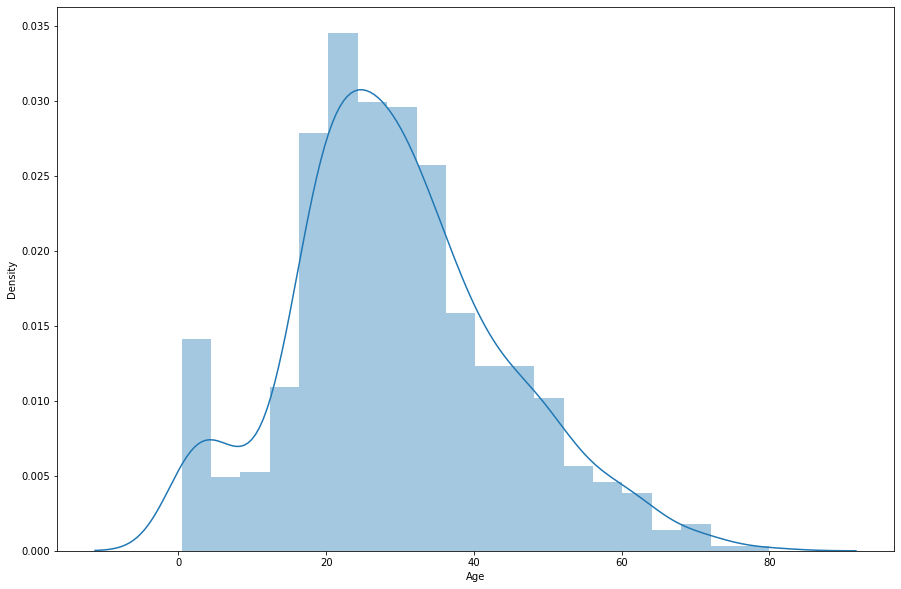

In [9]:
plt.figure(figsize=(15,10))
sns.distplot(df['Age'])

In [10]:
df['Age'] = df['Age'].fillna(value=df['Age'].median())

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

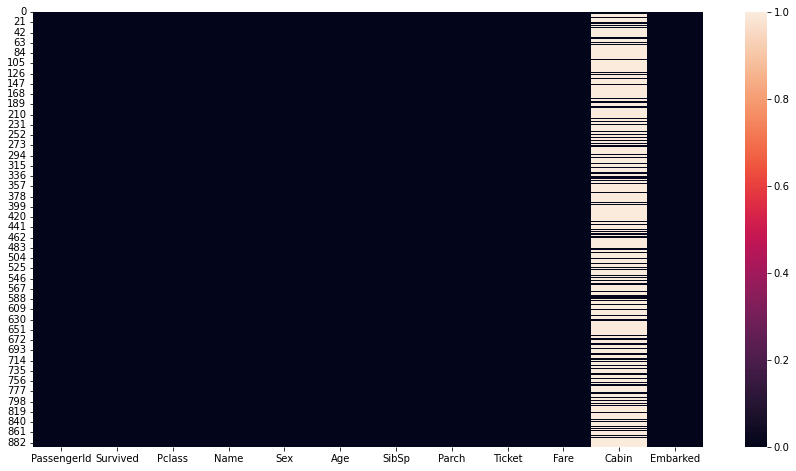

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())

In [14]:
df.drop('Cabin',axis=1,inplace=True)

In [15]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# EDA

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [17]:
n_col=['Survived','Pclass','Age','SibSp','Parch','Fare']

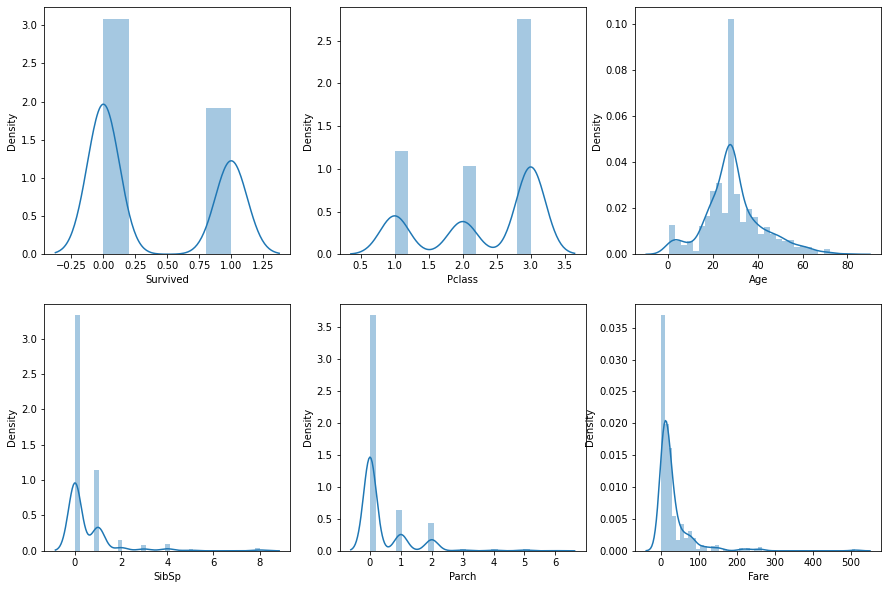

In [18]:
plt.figure(figsize=(15,10))
for idx, col in enumerate(n_col):
    plt.subplot(2,3,idx+1)
    sns.distplot(df[col])

<AxesSubplot:xlabel='Survived', ylabel='count'>

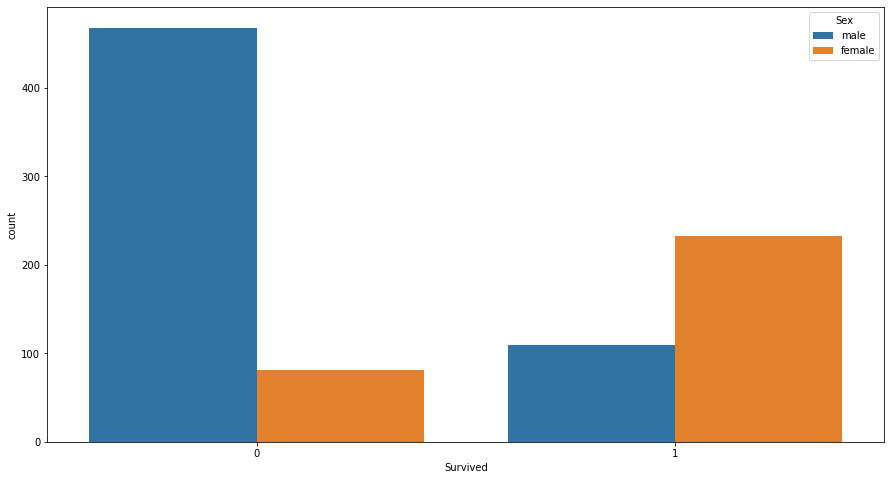

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(x='Survived',data=df,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

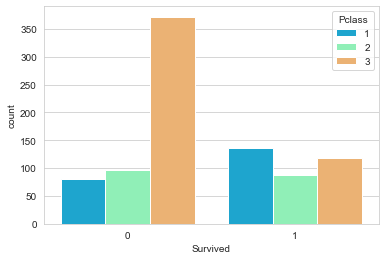

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

<AxesSubplot:xlabel='Sex', ylabel='count'>

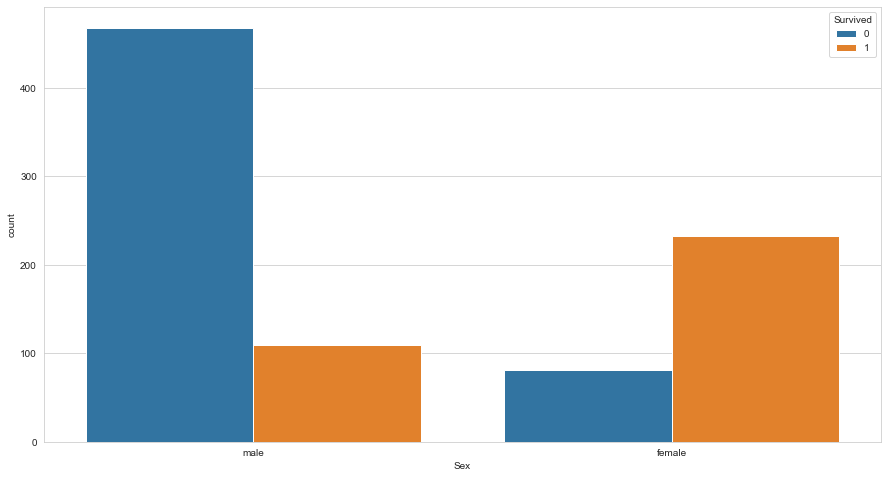

In [21]:
plt.figure(figsize=(15,8))
sns.countplot(x='Sex',data=df,hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='Density'>

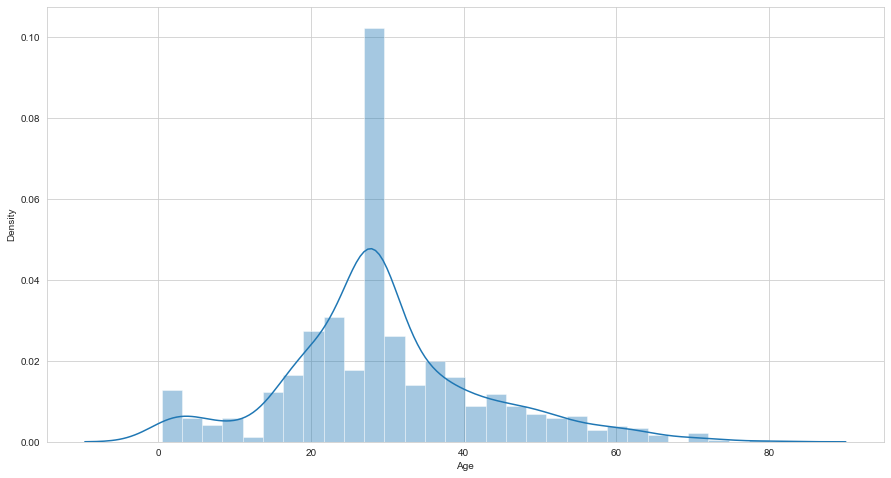

In [22]:
plt.figure(figsize=(15,8))
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

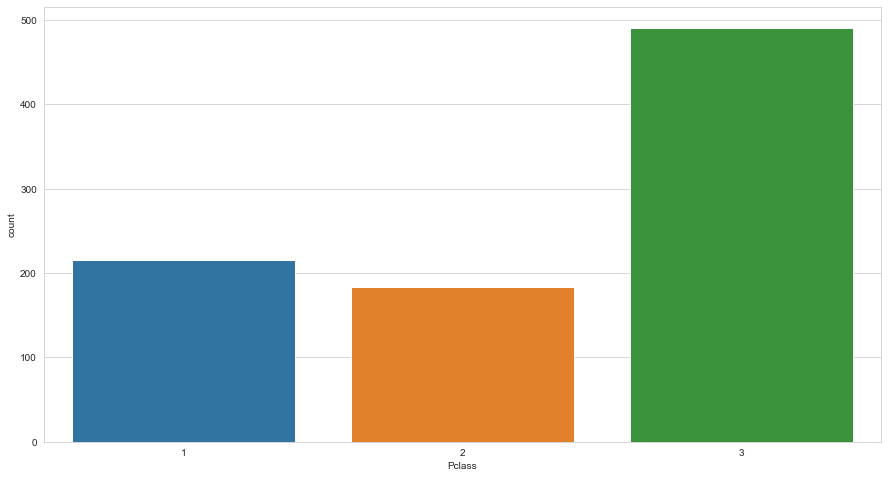

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(x='Pclass',data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

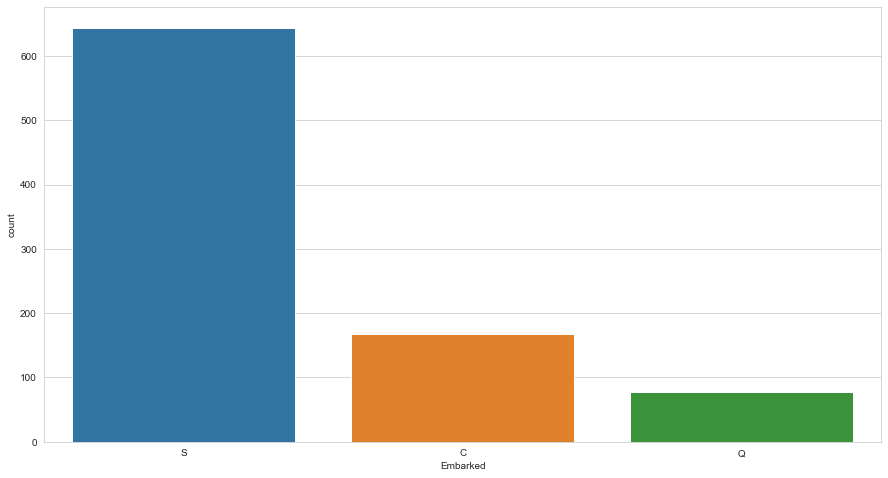

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(x='Embarked',data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

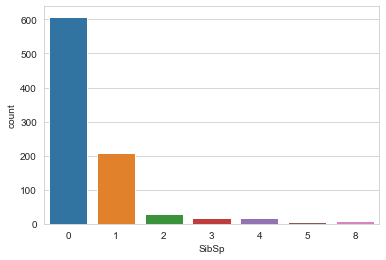

In [25]:
sns.countplot(x='SibSp',data=df)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

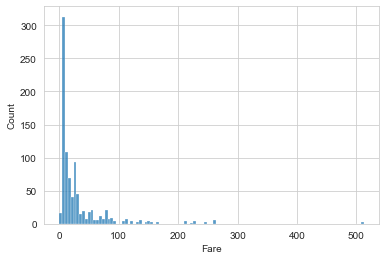

In [26]:
sns.histplot(df['Fare'])

<AxesSubplot:>

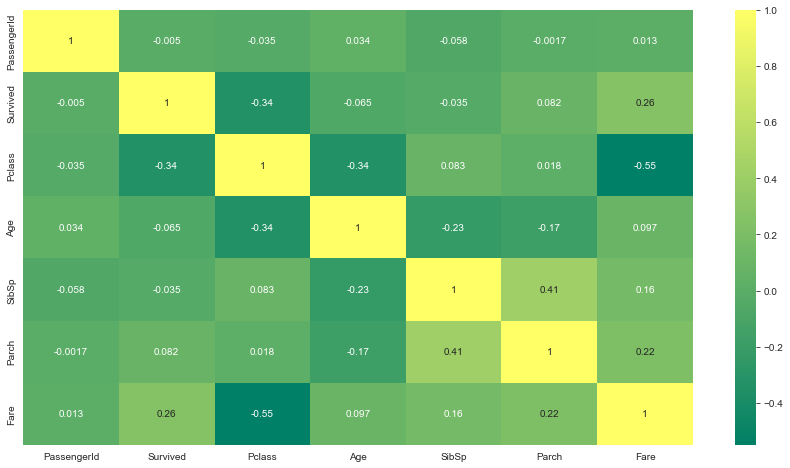

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='summer')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

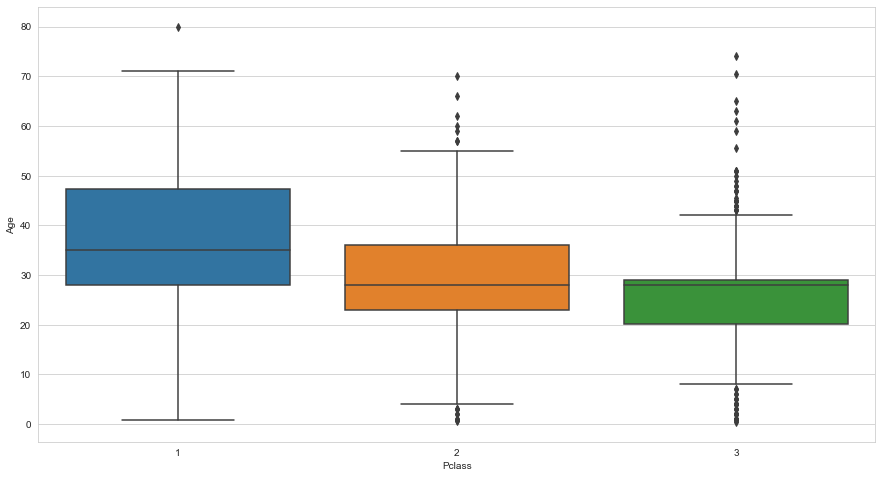

In [28]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Pclass',y='Age',data=df)

In [29]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

# Model Building

In [30]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [31]:
# Droping Useless col
df.drop(['PassengerId','Name','Ticket','Embarked'],axis=1,inplace=True)

In [32]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


### Converting Categorical col to Numeric col

In [33]:
df=pd.get_dummies(df,drop_first=True)

In [34]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


## Spliting the dataset into x and y

In [35]:
X=df.drop('Survived',axis=1)
Y=df['Survived']

### Train Test Split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test,  Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state=101)

In [37]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(623, 6)
(623,)
(268, 6)
(268,)


# Model Creation

In [38]:
from sklearn.linear_model import LogisticRegression
logi_model=LogisticRegression()
logi_model.fit(X_train,Y_train)

LogisticRegression()

In [39]:
y_pred = logi_model.predict(X_test)

## Performence Matrix
1. Accuracy Score
2. Confusion Matrix
3. Performence Matrix (recall, precision, F- score)
4. AUC-ROC Curve

In [40]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)

In [41]:
accuracy

0.7686567164179104

In [42]:
accuracy*100

76.86567164179104

In [43]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,28.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


# Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [46]:
Y_pred=dt.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.7985074626865671

# Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
dt=RandomForestClassifier()
dt.fit(X_train,Y_train)

RandomForestClassifier()

In [49]:
Y_pred=dt.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.8246268656716418

# Confusion Matrix

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix(Y_test, Y_pred)

array([[135,  19],
       [ 28,  86]], dtype=int64)

In [52]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       154
           1       0.82      0.75      0.79       114

    accuracy                           0.82       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.82      0.82      0.82       268

